In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [29]:
# Drop rows with missing values in the 'Year' column
df = df.dropna(subset=['Year','Publisher'])

In [30]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [33]:
df.shape

(16291, 11)

In [34]:
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre','Publisher'])

In [35]:
numerical_columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
categorical_columns = list(set(df_encoded.columns) - set(numerical_columns))

In [36]:
scaler = MinMaxScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [37]:
#Display the encoded and scaled dataset
df_encoded.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_2600,Platform_3DO,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,Wii Sports,0.650,1.000000,1.000000,0.368885,0.800378,1.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Super Mario Bros.,0.125,0.700892,0.123363,0.666341,0.072848,0.486281,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Mario Kart Wii,0.700,0.382020,0.443832,0.370841,0.313150,0.432854,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Wii Sports Resort,0.725,0.379610,0.379394,0.320939,0.280038,0.398767,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Pokemon Red/Pokemon Blue,0.400,0.271632,0.306340,1.000000,0.094607,0.379064,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df_encoded.shape

(16291, 627)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = df_encoded.drop(columns=['Global_Sales','Name','Rank'])
y = df_encoded['Global_Sales']

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [41]:
# Extract feature importance from the trained model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

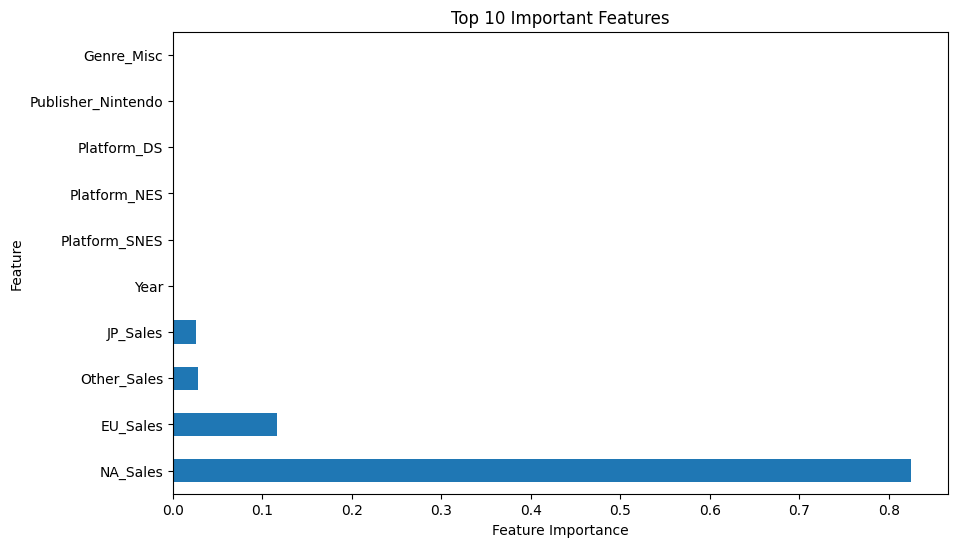

In [42]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [43]:
threshold = 0.01  # Set your own threshold
selected_features = feature_importance[feature_importance >= threshold].index.tolist()

In [44]:
df_selected = df[selected_features]
print(df_selected.head())

   NA_Sales  EU_Sales  Other_Sales  JP_Sales
0     41.49     29.02         8.46      3.77
1     29.08      3.58         0.77      6.81
2     15.85     12.88         3.31      3.79
3     15.75     11.01         2.96      3.28
4     11.27      8.89         1.00     10.22


In [45]:
# Split the dataset into features and target
X = df_selected  # Features
y = df['Global_Sales']  # Target

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 2.8722212446661083e-05
R-squared score: 0.9999932860147335
